#### Insurance Medical Cost Predictions

#### In a previous project "Medical cost EDA" exploratory data analysis was performed on a medical insurance data set. The project objective then was  to understand the  and prepare the data for creating machine learning models that can predict the cost of future customers. That objective there was met by presenting a myriad of data visualizations depicting how data features relate to the cutomer charges.  In this second part of the overall project I use the information learned from the  EDA in the development of multiple predictive models. The objectivie of this work is to develop, evaluate and establish a machine learning model that can effectively predict customer charges for future clients. Here five regression algorithms are trained and evaluated; of the five one is selected to make predictions on unseen data. The predictions are then evaluated and plotted. The data set is composed of 1,338 incidences and 7 features. Each incidence is a patient; the 7 features are age, bmi, sex, number of children/dependents,smoker, region, & charges. The feature charges here stands for the cost of the customer to the insurance company.

In [1]:
#import modules needed for the regression task
#numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from math import sqrt

#cross validation
from sklearn.model_selection import train_test_split

In [2]:
# import the data
ins_mod=pd.read_csv('ins_mod.csv', header = 0)

In [3]:
# a Quick look at the few rows of the data
ins_mod.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges,Charges_scale,Age_Group,BMI_scale,SEX,Charges_scale2,BMI_scale2,Age_Group2,Region2,smoker2
0,0,19,female,27.900,0,yes,southwest,16884.92400,MedLow,young,overweight,2,2,3.0,1.0,2,1
1,1,18,male,33.770,1,no,southeast,1725.55230,Low,young,obese,1,1,4.0,1.0,1,0
2,2,28,male,33.000,3,no,southeast,4449.46200,Low,young,obese,1,1,4.0,1.0,1,0
3,3,33,male,22.705,0,no,northwest,21984.47061,Medium,young,healthy,1,3,2.0,1.0,4,0
4,4,32,male,28.880,0,no,northwest,3866.85520,Low,young,overweight,1,1,3.0,1.0,4,0


In [4]:
# remove unnamed column
ins_mod= ins_mod.drop(['Unnamed: 0'], axis = 1)

In [5]:
# confirm removal of unnamed column
ins_mod.head()

,age,sex,bmi,children,smoker,region,charges,Charges_scale,Age_Group,BMI_scale,SEX,Charges_scale2,BMI_scale2,Age_Group2,Region2,smoker2
0,19,female,27.900,0,yes,southwest,16884.92400,MedLow,young,overweight,2,2,3.0,1.0,2,1
1,18,male,33.770,1,no,southeast,1725.55230,Low,young,obese,1,1,4.0,1.0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,Low,young,obese,1,1,4.0,1.0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,Medium,young,healthy,1,3,2.0,1.0,4,0
4,32,male,28.880,0,no,northwest,3866.85520,Low,young,overweight,1,1,3.0,1.0,4,0


For a regression problem the data must be numerical. During the EDA portion of this project most column were converted to numerical data except for smoker. Here I will change the smoker feature to be represented by numbers and a new column with the data. 

This will be followed by rearranging the order of the features for easier feature selection.

In [6]:
#create a function to define patients smoking preference
def yes_no(smoker2):
    smoker = smoker2
    if smoker == 'yes' :return 1
    if smoker == 'no' :return 0

In [7]:
# add a column to ins_mod describing smoker with integers
ins_mod['smoker2']=ins_mod['smoker'].apply(yes_no)

In [8]:
# confirm the addtion of smoker2 column
ins_mod.head()

,age,sex,bmi,children,smoker,region,charges,Charges_scale,Age_Group,BMI_scale,SEX,Charges_scale2,BMI_scale2,Age_Group2,Region2,smoker2
0,19,female,27.900,0,yes,southwest,16884.92400,MedLow,young,overweight,2,2,3.0,1.0,2,1
1,18,male,33.770,1,no,southeast,1725.55230,Low,young,obese,1,1,4.0,1.0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,Low,young,obese,1,1,4.0,1.0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,Medium,young,healthy,1,3,2.0,1.0,4,0
4,32,male,28.880,0,no,northwest,3866.85520,Low,young,overweight,1,1,3.0,1.0,4,0


In [9]:
# create csv file of modified data set 
ins_mod.to_csv("ins_mod.csv", sep=',')

#### Create new data frame and extract the features in numeric representation.
this approach can also be used to rearange the feature order.

In [10]:
ins_mod2 = ins_mod[['age','SEX','bmi','children','smoker2','Region2','charges']]

In [11]:
ins_mod2.head()

,age,SEX,bmi,children,smoker2,Region2,charges
0,19,2,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,4,21984.47061
4,32,1,28.880,0,0,4,3866.85520


#### Data Selection

In [12]:
# feature selection: select features using iloc
features=ins_mod2.iloc[:,0:6]
print('Summary of feature sample')
features.head()

Summary of feature sample


,age,SEX,bmi,children,smoker2,Region2
0,19,2,27.900,0,1,2
1,18,1,33.770,1,0,1
2,28,1,33.000,3,0,1
3,33,1,22.705,0,0,4
4,32,1,28.880,0,0,4


In [13]:
# select the dependent variable using pandas
depVar = ins_mod2['charges']

In [14]:
# Establish the training set for the x-variables in this case all of them 
X_train=(features[:])
X_train_count = len(X_train.index)
print ('Then number of observations in the X training set are:', str (X_train_count))
X_train.head()

Then number of observations in the X training set are: 1338


,age,SEX,bmi,children,smoker2,Region2
0,19,2,27.900,0,1,2
1,18,1,33.770,1,0,1
2,28,1,33.000,3,0,1
3,33,1,22.705,0,0,4
4,32,1,28.880,0,0,4


In [15]:
# Establish the training set for the Y-variable or dependent variable(the number of row must match)
# the X_train set.
Y_train = (depVar[:])
Y_train_count = len(Y_train.index)
print('The number of obsevation in the Y training set are:', str(Y_train_count))
Y_train.head()

The number of obsevation in the Y training set are: 1338


0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [16]:
# Establish the testing set for the X variables. (that is the portion of the features that will 
# be used for testing the model).
# Testing set (X Testing)
X_test=features[-200:]
X_test_count = len (X_test.index)
print('The number of observations in the feature testing set is:', str(X_test_count))
print (X_test.head())

The number of observations in the feature testing set is: 200
      age  SEX    bmi  children  smoker2  Region2
1138   33    1  30.25         0        0        1
1139   19    2  32.49         0        1        4
1140   50    1  37.07         1        0        1
1141   41    2  32.60         3        0        2
1142   52    2  24.86         0        0        1


In [17]:
# establish the ground truth.(that is establsih the portion of the feature which will be used to 
# test for Y the dependent variable).
#Ground Truth
Y_test=depVar[-200:]
Y_test_count=len (Y_test.index)
print('The number of observation in the y training (dependent variable)set are:', str(Y_test_count))
Y_test.head()

The number of observation in the y training (dependent variable)set are: 200


1138     3704.35450
1139    36898.73308
1140     9048.02730
1141     7954.51700
1142    27117.99378
Name: charges, dtype: float64

In [18]:
# Use cross validation to evaluate the machine learning model's skill on unseen data.
# must import : from sklearn.cross_validation import train_test_split

# Since our training and testing sets are already established implement cross validation.
X_train, X_test, Y_train, Y_test = train_test_split(X_train,Y_train)

# use the shape function to confirm the split was made as needed:
X_train.shape, X_test.shape

((1003, 6), (335, 6))

#### Model Building and Evaluation

In [19]:
# Establish the variables (names) that will represent each model.
modelSVR = SVR(gamma = 'scale')
modelRF  = RandomForestRegressor(n_estimators = 100)
modelLR  = LinearRegression()
modelMLP = MLPRegressor(max_iter=1200)
modelXGBR = XGBRegressor()

In [20]:
# confirm the variable for our features. The "features" variable was created earlierusing iloc.

print('Summary of feature sample')
features.head()

Summary of feature sample


,age,SEX,bmi,children,smoker2,Region2
0,19,2,27.900,0,1,2
1,18,1,33.770,1,0,1
2,28,1,33.000,3,0,1
3,33,1,22.705,0,0,4
4,32,1,28.880,0,0,4


In [21]:
# confirm the dependent variable
depVar.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

#### Random Forest Model Fitting and Evaluation

Note: use the cross validation score to evaluate the models; the model with the highest score should be used for making predictions. first confirm that the right library has been imported from sklearn.model_selection import cross_val_score. This was done in the first cell of the notebook.

The values correspond to the following: 1st value - The score array for test scores on each cv split. (Higher is an indicator of better performing model). 2nd value - The time for fitting the estimator on the train set for each cv split. 3rd value - The time for scoring the estimator on the test set for each cv split.

In [22]:
## Model fitting
# 1. pass the training data thru the model and  "fit" fuction to allow for training and model building
# 2. use cross validation score to evaluate the model
# 3. score the trained model
modelRF.fit(X_train,Y_train)
print('modelRF cross validation scores')
print (cross_val_score(modelRF, X_train, Y_train, cv =5))
print('modelRF trained model score')
modelRF.score(X_train, Y_train)

modelRF cross validation scores
[0.80847246 0.83100217 0.80585034 0.83445821 0.87145599]
modelRF trained model score


0.9755923614838276

#### Suppor Vector Regression Fitting Model and Scoring

In [23]:
modelSVR.fit(X_train, Y_train)
print('modelSVR cross validation scores')
print(cross_val_score(modelSVR, X_train, Y_train, cv = 5))
print('modelSVR trained model score')
modelSVR.score(X_train, Y_train)

modelSVR cross validation scores
[-0.03162924 -0.16426464 -0.11057446 -0.14365511 -0.15556871]
modelSVR trained model score


-0.11654090112812487

#### Linear Regression Model Fitting and Scoring

In [24]:
modelLR.fit(X_train, Y_train)
print('modelLR cross validation scores')
print(cross_val_score(modelLR, X_train, Y_train, cv=5))
print('modelLR trained model score')
modelLR.score(X_train, Y_train)

modelLR cross validation scores
[0.71070048 0.73735626 0.71502633 0.73897057 0.80264703]
modelLR trained model score


0.7499170369869574

#### Neural Networks MLP Regressor model Fitting and Scoring

In [25]:
modelMLP.fit(X_train, Y_train)
print('modeMLP cross validation scores')
print(cross_val_score(modelMLP, X_train, Y_train, cv=5))
print('modelMLP trained model score')
modelMLP.score(X_train, Y_train)

C:\Users\Alberto\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


modeMLP cross validation scores
[0.12227899 0.10334679 0.13335387 0.08036549 0.16798406]
modelMLP trained model score


0.16189196725297728

#### XGBRegressor Model Fitting and Evaluation

In [26]:
modelXGBR.fit(X_train, Y_train)
print('modelXGBR cross validation scores')
print(cross_val_score(modelXGBR, X_train, Y_train, cv=5))
print('modelXGBR trained model score')
modelXGBR.score(X_train, Y_train)

modelXGBR cross validation scores
[0.78019037 0.80792907 0.7755011  0.81212241 0.87382159]
modelXGBR trained model score


0.9959930374839951

#### Making Predictions and Evaluating the Results
XGBRegressor Model has been selected to make our prediction (it produced a trained model score of 0.995)

Note: The sklearn.metrics object is the main object that contains most of the metric fuctions needed. confirm that: from sklearn.metrics import mean_squared_error & from sklearn metrics import r2_score are imported into the notebook.

 Addtionally, since this is a regression problem RMSE and R^2 will be used to measure the trained model. Since RMSE is the square root of mean_squared error.  confirm that :from math import sqrt.

In [30]:
# make predictions and metrics
predictionsXGBR = modelXGBR.predict(X_test)

# deterimine R^2 for the ground truth vs predictions
predRsquaredXGBR = r2_score(Y_test, predictionsXGBR)

# calculte rmse of ground truth vs predictions
rmseXGBR = sqrt (mean_squared_error (Y_test,predictionsXGBR))

print('R Squared modelXGBR: %.3f' % predRsquaredXGBR)
print('RMSE modelXGBR: %.3f' % rmseXGBR)

R Squared modelXGBR: 0.805
RMSE modelXGBR: 5443.404


Plotting the prediction results for modelRF:
The final step in producing a machine learning model is a plot to compare between the predictions and the known values(ground truth, Y_test). Alternatively the model can be deployed.

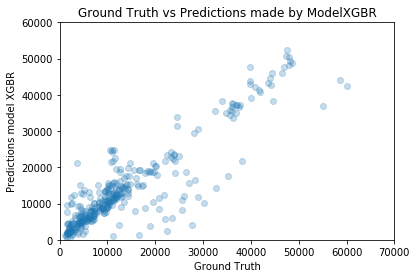

In [31]:
plt.scatter(Y_test,predictionsXGBR, alpha = 0.25)
plt.title ('Ground Truth vs Predictions made by ModelXGBR')
plt.xlabel('Ground Truth')
plt.ylabel('Predictions model XGBR')
plt.xlim(0,70000)
plt.ylim(0,60000)
plt.show()